## Imports

### Python Library Imports

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
pd.set_option('display.max_columns', None)

### Data Imports
Listings dataframes:

In [3]:
dfNov2016 = pd.read_csv('../raw_data/inside_airbnb/1116listings.csv')
dfDec2016 = pd.read_csv('../raw_data/inside_airbnb/1216listings.csv')
dfJan2017 = pd.read_csv('../raw_data/inside_airbnb/0117listings.csv')
dfFeb2017 = pd.read_csv('../raw_data/inside_airbnb/0217listings.csv')
dfMar2017 = pd.read_csv('../raw_data/inside_airbnb/0317listings.csv')
dfApr2017 = pd.read_csv('../raw_data/inside_airbnb/0417listings.csv')
dfMay2017 = pd.read_csv('../raw_data/inside_airbnb/0517listings.csv')
dfJun2017 = pd.read_csv('../raw_data/inside_airbnb/0617listings.csv')
dfJul2017 = pd.read_csv('../raw_data/inside_airbnb/0717listings.csv')
dfAug2017 = pd.read_csv('../raw_data/inside_airbnb/0817listings.csv')
dfSep2017 = pd.read_csv('../raw_data/inside_airbnb/0917listings.csv')
dfOct2017 = pd.read_csv('../raw_data/inside_airbnb/1017listings.csv')

/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# print(len(dfNov2016))
# print(len(dfDec2016))
# print(len(dfJan2017))
# print(len(dfFeb2017))
# print(len(dfMar2017))
# print(len(dfApr2017))
# print(len(dfMay2017))
# print(len(dfJun2017))
# print(len(dfJul2017))
# print(len(dfAug2017))
# print(len(dfSep2017))
# print(len(dfOct2017))

## Data Preprocessing
### Listings dataframe
#### Price
Convert all price columns from strings to integers.

In [4]:
def make_int(string):
    if pd.isnull(string):
        return string
    else:
        string = re.sub(',', '', string)
        match = re.search(r'([\$])(\d+)([\.])(00)', string)
        if match:
            return match.group(2)

In [5]:
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

In [6]:
dfNov2016[price_columns] = dfNov2016[price_columns].applymap(make_int).astype(float)
dfDec2016[price_columns] = dfDec2016[price_columns].applymap(make_int).astype(float)
dfJan2017[price_columns] = dfJan2017[price_columns].applymap(make_int).astype(float)
dfFeb2017[price_columns] = dfFeb2017[price_columns].applymap(make_int).astype(float)
dfMar2017[price_columns] = dfMar2017[price_columns].applymap(make_int).astype(float)
dfApr2017[price_columns] = dfApr2017[price_columns].applymap(make_int).astype(float)
dfMay2017[price_columns] = dfMay2017[price_columns].applymap(make_int).astype(float)
dfJun2017[price_columns] = dfJun2017[price_columns].applymap(make_int).astype(float)
dfJul2017[price_columns] = dfJul2017[price_columns].applymap(make_int).astype(float)
dfAug2017[price_columns] = dfAug2017[price_columns].applymap(make_int).astype(float)
dfSep2017[price_columns] = dfSep2017[price_columns].applymap(make_int).astype(float)
dfOct2017[price_columns] = dfOct2017[price_columns].applymap(make_int).astype(float)

Convert numerical columns from string to float.

In [7]:
numerical_columns = ['id', 'scrape_id', 'host_id', 'host_listings_count', 'latitude', 'longitude', 'square_feet', 'extra_people']

In [8]:
dfNov2016[numerical_columns] = dfNov2016[numerical_columns].astype(float)
dfDec2016[numerical_columns] = dfDec2016[numerical_columns].astype(float)
dfJan2017[numerical_columns] = dfJan2017[numerical_columns].astype(float)
dfFeb2017[numerical_columns] = dfFeb2017[numerical_columns].astype(float)
dfMar2017[numerical_columns] = dfMar2017[numerical_columns].astype(float)
dfApr2017[numerical_columns] = dfApr2017[numerical_columns].astype(float)
dfMay2017[numerical_columns] = dfMay2017[numerical_columns].astype(float)
dfJun2017[numerical_columns] = dfJun2017[numerical_columns].astype(float)
dfJul2017[numerical_columns] = dfJul2017[numerical_columns].astype(float)
dfAug2017[numerical_columns] = dfAug2017[numerical_columns].astype(float)
dfSep2017[numerical_columns] = dfSep2017[numerical_columns].astype(float)
dfOct2017[numerical_columns] = dfOct2017[numerical_columns].astype(float)

#### Zipcode
Clean up 'zipcode' column.

In [9]:
print(dfNov2016.index[dfNov2016.zipcode == '1m'].tolist())
print(dfDec2016.index[dfDec2016.zipcode == '1m'].tolist())
print(dfJan2017.index[dfJan2017.zipcode == '1m'].tolist())
print(dfFeb2017.index[dfFeb2017.zipcode == '1m'].tolist())
print(dfMar2017.index[dfMar2017.zipcode == '1m'].tolist())
print(dfApr2017.index[dfApr2017.zipcode == '1m'].tolist())
print(dfMay2017.index[dfMay2017.zipcode == '1m'].tolist())
print(dfJun2017.index[dfJun2017.zipcode == '1m'].tolist())
print(dfJul2017.index[dfJul2017.zipcode == '1m'].tolist())
print(dfAug2017.index[dfAug2017.zipcode == '1m'].tolist())
print(dfSep2017.index[dfSep2017.zipcode == '1m'].tolist())
print(dfOct2017.index[dfOct2017.zipcode == '1m'].tolist())

[22924]
[23943]
[16139]
[33335]
[33933]
[34197]
[34844]
[35109]
[36266]
[36271]
[33274]
[36412]


In [10]:
dfNov2016 = dfNov2016.set_value(22924, 'zipcode', np.nan)
dfDec2016 = dfDec2016.set_value(23943, 'zipcode', np.nan)
dfJan2017 = dfJan2017.set_value(16139, 'zipcode', np.nan)
dfFeb2017 = dfFeb2017.set_value(33335, 'zipcode', np.nan)
dfMar2017 = dfMar2017.set_value(33933, 'zipcode', np.nan)
dfApr2017 = dfApr2017.set_value(34197, 'zipcode', np.nan)
dfMay2017 = dfMay2017.set_value(34844, 'zipcode', np.nan)
dfJun2017 = dfJun2017.set_value(35109, 'zipcode', np.nan)
dfJul2017 = dfJul2017.set_value(36266, 'zipcode', np.nan)
dfAug2017 = dfAug2017.set_value(36271, 'zipcode', np.nan)
dfSep2017 = dfSep2017.set_value(33274, 'zipcode', np.nan)
dfOct2017 = dfOct2017.set_value(36412, 'zipcode', np.nan)

In [11]:
def fix_zipcode(zipcode):
    if pd.isnull(zipcode):
        return zipcode
    if isinstance(zipcode, float):
        return zipcode
    elif len(zipcode) < 5:
        return np.nan
    else:
        return zipcode[:5]

In [12]:
dfNov2016.zipcode = dfNov2016.zipcode.apply(fix_zipcode).astype(float)
dfDec2016.zipcode = dfDec2016.zipcode.apply(fix_zipcode).astype(float)
dfJan2017.zipcode = dfJan2017.zipcode.apply(fix_zipcode).astype(float)
dfFeb2017.zipcode = dfFeb2017.zipcode.apply(fix_zipcode).astype(float)
dfMar2017.zipcode = dfMar2017.zipcode.apply(fix_zipcode).astype(float)
dfApr2017.zipcode = dfApr2017.zipcode.apply(fix_zipcode).astype(float)
dfMay2017.zipcode = dfMay2017.zipcode.apply(fix_zipcode).astype(float)
dfJun2017.zipcode = dfJun2017.zipcode.apply(fix_zipcode).astype(float)
dfJul2017.zipcode = dfJul2017.zipcode.apply(fix_zipcode).astype(float)
dfAug2017.zipcode = dfAug2017.zipcode.apply(fix_zipcode).astype(float)
dfSep2017.zipcode = dfSep2017.zipcode.apply(fix_zipcode).astype(float)
dfOct2017.zipcode = dfOct2017.zipcode.apply(fix_zipcode).astype(float)

#### Datetime
Check format of date-based columns.

In [13]:
date_columns = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']

In [14]:
dfNov2016[date_columns] = dfNov2016[date_columns].apply(pd.to_datetime)
dfDec2016[date_columns] = dfDec2016[date_columns].apply(pd.to_datetime)
dfJan2017[date_columns] = dfJan2017[date_columns].apply(pd.to_datetime)
dfFeb2017[date_columns] = dfFeb2017[date_columns].apply(pd.to_datetime)
dfMar2017[date_columns] = dfMar2017[date_columns].apply(pd.to_datetime)
dfApr2017[date_columns] = dfApr2017[date_columns].apply(pd.to_datetime)
dfMay2017[date_columns] = dfMay2017[date_columns].apply(pd.to_datetime)
dfJun2017[date_columns] = dfJun2017[date_columns].apply(pd.to_datetime)
dfJul2017[date_columns] = dfJul2017[date_columns].apply(pd.to_datetime)
dfAug2017[date_columns] = dfAug2017[date_columns].apply(pd.to_datetime)
dfSep2017[date_columns] = dfSep2017[date_columns].apply(pd.to_datetime)
dfOct2017[date_columns] = dfOct2017[date_columns].apply(pd.to_datetime)

#### Amenities
Split up column 'amenities' into individual features.

In [15]:
amenities = dfOct2017.amenities.tolist()

In [16]:
len(amenities)

44317

In [17]:
amenities[0]

'{TV,"Wireless Internet","Air conditioning",Kitchen,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card",Essentials,"Hair dryer","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}'

In [18]:
def string_to_list(string):
    # amenities will be a binary list for 15 things: [essentials, pool, kitchen, washer, parking, 
    # elevator, hot tub, gym, wifi, tv, heat, AC, fireplace, pets, lock]
    amenities = []
    if 'Essentials' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Pool' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Kitchen' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Washer' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'parking' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Elevator' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Hot tub' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Gym' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Wireless Internet' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'TV' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Heating' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Air conditioning' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'fireplace' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Pets allowed' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    if 'Lock on bedroom door' in string:
        amenities.append(1)
    else:
        amenities.append(0)
    return amenities

In [19]:
dfNov2016['amenities_list'] = dfNov2016['amenities'].map(string_to_list)
dfDec2016['amenities_list'] = dfDec2016['amenities'].map(string_to_list)
dfJan2017['amenities_list'] = dfJan2017['amenities'].map(string_to_list)
dfFeb2017['amenities_list'] = dfFeb2017['amenities'].map(string_to_list)
dfMar2017['amenities_list'] = dfMar2017['amenities'].map(string_to_list)
dfApr2017['amenities_list'] = dfApr2017['amenities'].map(string_to_list)
dfMay2017['amenities_list'] = dfMay2017['amenities'].map(string_to_list)
dfJun2017['amenities_list'] = dfJun2017['amenities'].map(string_to_list)
dfJul2017['amenities_list'] = dfJul2017['amenities'].map(string_to_list)
dfAug2017['amenities_list'] = dfAug2017['amenities'].map(string_to_list)
dfSep2017['amenities_list'] = dfSep2017['amenities'].map(string_to_list)
dfOct2017['amenities_list'] = dfOct2017['amenities'].map(string_to_list)

Convert amentities list to individual binarized columns for each amenity (feature).

In [20]:
amenities_columns = ['essentials', 'pool', 'kitchen', 'washer', 'parking', 'elevator', 'hot_tub', 'gym', 
            'wifi', 'tv', 'heat', 'AC', 'fireplace', 'pets_allowed', 'lock']

In [21]:
dfNov2016[amenities_columns] = pd.DataFrame(dfNov2016.amenities_list.values.tolist(), index=dfNov2016.index)
dfDec2016[amenities_columns] = pd.DataFrame(dfDec2016.amenities_list.values.tolist(), index=dfDec2016.index)
dfJan2017[amenities_columns] = pd.DataFrame(dfJan2017.amenities_list.values.tolist(), index=dfJan2017.index)
dfFeb2017[amenities_columns] = pd.DataFrame(dfFeb2017.amenities_list.values.tolist(), index=dfFeb2017.index)
dfMar2017[amenities_columns] = pd.DataFrame(dfMar2017.amenities_list.values.tolist(), index=dfMar2017.index)
dfApr2017[amenities_columns] = pd.DataFrame(dfApr2017.amenities_list.values.tolist(), index=dfApr2017.index)
dfMay2017[amenities_columns] = pd.DataFrame(dfMay2017.amenities_list.values.tolist(), index=dfMay2017.index)
dfJun2017[amenities_columns] = pd.DataFrame(dfJun2017.amenities_list.values.tolist(), index=dfJun2017.index)
dfJul2017[amenities_columns] = pd.DataFrame(dfJul2017.amenities_list.values.tolist(), index=dfJul2017.index)
dfAug2017[amenities_columns] = pd.DataFrame(dfAug2017.amenities_list.values.tolist(), index=dfAug2017.index)
dfSep2017[amenities_columns] = pd.DataFrame(dfSep2017.amenities_list.values.tolist(), index=dfSep2017.index)
dfOct2017[amenities_columns] = pd.DataFrame(dfOct2017.amenities_list.values.tolist(), index=dfOct2017.index)

#### Replace True/False binary labels with 1/0

In [22]:
dfNov2016.replace('t', 1, inplace=True)
dfDec2016.replace('t', 1, inplace=True)
dfJan2017.replace('t', 1, inplace=True)
dfFeb2017.replace('t', 1, inplace=True)
dfMar2017.replace('t', 1, inplace=True)
dfApr2017.replace('t', 1, inplace=True)
dfMay2017.replace('t', 1, inplace=True)
dfJun2017.replace('t', 1, inplace=True)
dfJul2017.replace('t', 1, inplace=True)
dfAug2017.replace('t', 1, inplace=True)
dfSep2017.replace('t', 1, inplace=True)
dfOct2017.replace('t', 1, inplace=True)

In [23]:
dfNov2016.replace('f', 0, inplace=True)
dfDec2016.replace('f', 0, inplace=True)
dfJan2017.replace('f', 0, inplace=True)
dfFeb2017.replace('f', 0, inplace=True)
dfMar2017.replace('f', 0, inplace=True)
dfApr2017.replace('f', 0, inplace=True)
dfMay2017.replace('f', 0, inplace=True)
dfJun2017.replace('f', 0, inplace=True)
dfJul2017.replace('f', 0, inplace=True)
dfAug2017.replace('f', 0, inplace=True)
dfSep2017.replace('f', 0, inplace=True)
dfOct2017.replace('f', 0, inplace=True)

## Feature Engineering

### Make dummy variables for categorical features
#### Property type, room type, bed type

In [24]:
dfNov2016['apartment'] = np.where(dfNov2016['property_type'] == 'Apartment', 1, 0)
dfNov2016['house'] = np.where(dfNov2016['property_type'] == 'House', 1, 0)
dfNov2016['loft'] = np.where(dfNov2016['property_type'] == 'Loft', 1, 0)
dfNov2016['townhouse'] = np.where(dfNov2016['property_type'] == 'Townhouse', 1, 0)
dfNov2016['condo'] = np.where(dfNov2016['property_type'] == 'Condominium', 1, 0)
dfNov2016['entire_home'] = np.where(dfNov2016['room_type'] == 'Entire home/apt', 1, 0)
dfNov2016['private_room'] = np.where(dfNov2016['room_type'] == 'Private room', 1, 0)
dfNov2016['shared_room'] = np.where(dfNov2016['room_type'] == 'Shared room', 1, 0)
dfNov2016['real_bed'] = np.where(dfNov2016['bed_type'] == 'Real Bed', 1, 0)

In [25]:
dfDec2016['apartment'] = np.where(dfDec2016['property_type'] == 'Apartment', 1, 0)
dfDec2016['house'] = np.where(dfDec2016['property_type'] == 'House', 1, 0)
dfDec2016['loft'] = np.where(dfDec2016['property_type'] == 'Loft', 1, 0)
dfDec2016['townhouse'] = np.where(dfDec2016['property_type'] == 'Townhouse', 1, 0)
dfDec2016['condo'] = np.where(dfDec2016['property_type'] == 'Condominium', 1, 0)
dfDec2016['entire_home'] = np.where(dfDec2016['room_type'] == 'Entire home/apt', 1, 0)
dfDec2016['private_room'] = np.where(dfDec2016['room_type'] == 'Private room', 1, 0)
dfDec2016['shared_room'] = np.where(dfDec2016['room_type'] == 'Shared room', 1, 0)
dfDec2016['real_bed'] = np.where(dfDec2016['bed_type'] == 'Real Bed', 1, 0)

In [26]:
dfJan2017['apartment'] = np.where(dfJan2017['property_type'] == 'Apartment', 1, 0)
dfJan2017['house'] = np.where(dfJan2017['property_type'] == 'House', 1, 0)
dfJan2017['loft'] = np.where(dfJan2017['property_type'] == 'Loft', 1, 0)
dfJan2017['townhouse'] = np.where(dfJan2017['property_type'] == 'Townhouse', 1, 0)
dfJan2017['condo'] = np.where(dfJan2017['property_type'] == 'Condominium', 1, 0)
dfJan2017['entire_home'] = np.where(dfJan2017['room_type'] == 'Entire home/apt', 1, 0)
dfJan2017['private_room'] = np.where(dfJan2017['room_type'] == 'Private room', 1, 0)
dfJan2017['shared_room'] = np.where(dfJan2017['room_type'] == 'Shared room', 1, 0)
dfJan2017['real_bed'] = np.where(dfJan2017['bed_type'] == 'Real Bed', 1, 0)

In [27]:
dfFeb2017['apartment'] = np.where(dfFeb2017['property_type'] == 'Apartment', 1, 0)
dfFeb2017['house'] = np.where(dfFeb2017['property_type'] == 'House', 1, 0)
dfFeb2017['loft'] = np.where(dfFeb2017['property_type'] == 'Loft', 1, 0)
dfFeb2017['townhouse'] = np.where(dfFeb2017['property_type'] == 'Townhouse', 1, 0)
dfFeb2017['condo'] = np.where(dfFeb2017['property_type'] == 'Condominium', 1, 0)
dfFeb2017['entire_home'] = np.where(dfFeb2017['room_type'] == 'Entire home/apt', 1, 0)
dfFeb2017['private_room'] = np.where(dfFeb2017['room_type'] == 'Private room', 1, 0)
dfFeb2017['shared_room'] = np.where(dfFeb2017['room_type'] == 'Shared room', 1, 0)
dfFeb2017['real_bed'] = np.where(dfFeb2017['bed_type'] == 'Real Bed', 1, 0)

In [28]:
dfMar2017['apartment'] = np.where(dfMar2017['property_type'] == 'Apartment', 1, 0)
dfMar2017['house'] = np.where(dfMar2017['property_type'] == 'House', 1, 0)
dfMar2017['loft'] = np.where(dfMar2017['property_type'] == 'Loft', 1, 0)
dfMar2017['townhouse'] = np.where(dfMar2017['property_type'] == 'Townhouse', 1, 0)
dfMar2017['condo'] = np.where(dfMar2017['property_type'] == 'Condominium', 1, 0)
dfMar2017['entire_home'] = np.where(dfMar2017['room_type'] == 'Entire home/apt', 1, 0)
dfMar2017['private_room'] = np.where(dfMar2017['room_type'] == 'Private room', 1, 0)
dfMar2017['shared_room'] = np.where(dfMar2017['room_type'] == 'Shared room', 1, 0)
dfMar2017['real_bed'] = np.where(dfMar2017['bed_type'] == 'Real Bed', 1, 0)

In [29]:
dfApr2017['apartment'] = np.where(dfApr2017['property_type'] == 'Apartment', 1, 0)
dfApr2017['house'] = np.where(dfApr2017['property_type'] == 'House', 1, 0)
dfApr2017['loft'] = np.where(dfApr2017['property_type'] == 'Loft', 1, 0)
dfApr2017['townhouse'] = np.where(dfApr2017['property_type'] == 'Townhouse', 1, 0)
dfApr2017['condo'] = np.where(dfApr2017['property_type'] == 'Condominium', 1, 0)
dfApr2017['entire_home'] = np.where(dfApr2017['room_type'] == 'Entire home/apt', 1, 0)
dfApr2017['private_room'] = np.where(dfApr2017['room_type'] == 'Private room', 1, 0)
dfApr2017['shared_room'] = np.where(dfApr2017['room_type'] == 'Shared room', 1, 0)
dfApr2017['real_bed'] = np.where(dfApr2017['bed_type'] == 'Real Bed', 1, 0)

In [30]:
dfMay2017['apartment'] = np.where(dfMay2017['property_type'] == 'Apartment', 1, 0)
dfMay2017['house'] = np.where(dfMay2017['property_type'] == 'House', 1, 0)
dfMay2017['loft'] = np.where(dfMay2017['property_type'] == 'Loft', 1, 0)
dfMay2017['townhouse'] = np.where(dfMay2017['property_type'] == 'Townhouse', 1, 0)
dfMay2017['condo'] = np.where(dfMay2017['property_type'] == 'Condominium', 1, 0)
dfMay2017['entire_home'] = np.where(dfMay2017['room_type'] == 'Entire home/apt', 1, 0)
dfMay2017['private_room'] = np.where(dfMay2017['room_type'] == 'Private room', 1, 0)
dfMay2017['shared_room'] = np.where(dfMay2017['room_type'] == 'Shared room', 1, 0)
dfMay2017['real_bed'] = np.where(dfMay2017['bed_type'] == 'Real Bed', 1, 0)

In [31]:
dfJun2017['apartment'] = np.where(dfJun2017['property_type'] == 'Apartment', 1, 0)
dfJun2017['house'] = np.where(dfJun2017['property_type'] == 'House', 1, 0)
dfJun2017['loft'] = np.where(dfJun2017['property_type'] == 'Loft', 1, 0)
dfJun2017['townhouse'] = np.where(dfJun2017['property_type'] == 'Townhouse', 1, 0)
dfJun2017['condo'] = np.where(dfJun2017['property_type'] == 'Condominium', 1, 0)
dfJun2017['entire_home'] = np.where(dfJun2017['room_type'] == 'Entire home/apt', 1, 0)
dfJun2017['private_room'] = np.where(dfJun2017['room_type'] == 'Private room', 1, 0)
dfJun2017['shared_room'] = np.where(dfJun2017['room_type'] == 'Shared room', 1, 0)
dfJun2017['real_bed'] = np.where(dfJun2017['bed_type'] == 'Real Bed', 1, 0)

In [32]:
dfJul2017['apartment'] = np.where(dfJul2017['property_type'] == 'Apartment', 1, 0)
dfJul2017['house'] = np.where(dfJul2017['property_type'] == 'House', 1, 0)
dfJul2017['loft'] = np.where(dfJul2017['property_type'] == 'Loft', 1, 0)
dfJul2017['townhouse'] = np.where(dfJul2017['property_type'] == 'Townhouse', 1, 0)
dfJul2017['condo'] = np.where(dfJul2017['property_type'] == 'Condominium', 1, 0)
dfJul2017['entire_home'] = np.where(dfJul2017['room_type'] == 'Entire home/apt', 1, 0)
dfJul2017['private_room'] = np.where(dfJul2017['room_type'] == 'Private room', 1, 0)
dfJul2017['shared_room'] = np.where(dfJul2017['room_type'] == 'Shared room', 1, 0)
dfJul2017['real_bed'] = np.where(dfJul2017['bed_type'] == 'Real Bed', 1, 0)

In [33]:
dfAug2017['apartment'] = np.where(dfAug2017['property_type'] == 'Apartment', 1, 0)
dfAug2017['house'] = np.where(dfAug2017['property_type'] == 'House', 1, 0)
dfAug2017['loft'] = np.where(dfAug2017['property_type'] == 'Loft', 1, 0)
dfAug2017['townhouse'] = np.where(dfAug2017['property_type'] == 'Townhouse', 1, 0)
dfAug2017['condo'] = np.where(dfAug2017['property_type'] == 'Condominium', 1, 0)
dfAug2017['entire_home'] = np.where(dfAug2017['room_type'] == 'Entire home/apt', 1, 0)
dfAug2017['private_room'] = np.where(dfAug2017['room_type'] == 'Private room', 1, 0)
dfAug2017['shared_room'] = np.where(dfAug2017['room_type'] == 'Shared room', 1, 0)
dfAug2017['real_bed'] = np.where(dfAug2017['bed_type'] == 'Real Bed', 1, 0)

In [34]:
dfSep2017['apartment'] = np.where(dfSep2017['property_type'] == 'Apartment', 1, 0)
dfSep2017['house'] = np.where(dfSep2017['property_type'] == 'House', 1, 0)
dfSep2017['loft'] = np.where(dfSep2017['property_type'] == 'Loft', 1, 0)
dfSep2017['townhouse'] = np.where(dfSep2017['property_type'] == 'Townhouse', 1, 0)
dfSep2017['condo'] = np.where(dfSep2017['property_type'] == 'Condominium', 1, 0)
dfSep2017['entire_home'] = np.where(dfSep2017['room_type'] == 'Entire home/apt', 1, 0)
dfSep2017['private_room'] = np.where(dfSep2017['room_type'] == 'Private room', 1, 0)
dfSep2017['shared_room'] = np.where(dfSep2017['room_type'] == 'Shared room', 1, 0)
dfSep2017['real_bed'] = np.where(dfSep2017['bed_type'] == 'Real Bed', 1, 0)

In [35]:
dfOct2017['apartment'] = np.where(dfOct2017['property_type'] == 'Apartment', 1, 0)
dfOct2017['house'] = np.where(dfOct2017['property_type'] == 'House', 1, 0)
dfOct2017['loft'] = np.where(dfOct2017['property_type'] == 'Loft', 1, 0)
dfOct2017['townhouse'] = np.where(dfOct2017['property_type'] == 'Townhouse', 1, 0)
dfOct2017['condo'] = np.where(dfOct2017['property_type'] == 'Condominium', 1, 0)
dfOct2017['entire_home'] = np.where(dfOct2017['room_type'] == 'Entire home/apt', 1, 0)
dfOct2017['private_room'] = np.where(dfOct2017['room_type'] == 'Private room', 1, 0)
dfOct2017['shared_room'] = np.where(dfOct2017['room_type'] == 'Shared room', 1, 0)
dfOct2017['real_bed'] = np.where(dfOct2017['bed_type'] == 'Real Bed', 1, 0)

### Distance from city center
#### Haversine formula

In [36]:
from math import radians, sin, cos, sqrt, asin

In [37]:
def haversine(row):
    lat1 = 40.7128 # NYC
    lon1 = -74.0060 # NYC
    lat2 = row['latitude']
    lon2 = row['longitude']
    R = 6372.8 # Earth radius in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1) * cos(lat2) * sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [38]:
dfNov2016['distance_from_NYC'] = dfNov2016.apply(lambda row: haversine(row), axis=1)
dfDec2016['distance_from_NYC'] = dfDec2016.apply(lambda row: haversine(row), axis=1)
dfJan2017['distance_from_NYC'] = dfJan2017.apply(lambda row: haversine(row), axis=1)
dfFeb2017['distance_from_NYC'] = dfFeb2017.apply(lambda row: haversine(row), axis=1)
dfMar2017['distance_from_NYC'] = dfMar2017.apply(lambda row: haversine(row), axis=1)
dfApr2017['distance_from_NYC'] = dfApr2017.apply(lambda row: haversine(row), axis=1)
dfMay2017['distance_from_NYC'] = dfMay2017.apply(lambda row: haversine(row), axis=1)
dfJun2017['distance_from_NYC'] = dfJun2017.apply(lambda row: haversine(row), axis=1)
dfJul2017['distance_from_NYC'] = dfJul2017.apply(lambda row: haversine(row), axis=1)
dfAug2017['distance_from_NYC'] = dfAug2017.apply(lambda row: haversine(row), axis=1)
dfSep2017['distance_from_NYC'] = dfSep2017.apply(lambda row: haversine(row), axis=1)
dfOct2017['distance_from_NYC'] = dfOct2017.apply(lambda row: haversine(row), axis=1)

#### Counties (BeautifulSoup)

In [39]:
def get_counties(url):
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page,"lxml")
    counties = []
    for trs in soup.find(class_='inner_table').find_all('tr'):
        tds = trs.find_all('td')
        row = [elem.text for elem in tds][:3]
        counties.append(row)
    return counties[2:]

In [40]:
counties = get_counties('http://www.zipcodestogo.com/New%20York/')

In [41]:
dfCounties = pd.DataFrame(counties)
dfCounties.columns = ['zipcode', 'city', 'county']

In [42]:
dfCounties.head()

,zipcode,city,county
0,00501,Holtsville,Suffolk
1,00544,Holtsville,Suffolk
2,06390,Fishers Island,Suffolk
3,10001,New York,New York
4,10002,New York,New York


In [43]:
dfCounties.county.value_counts()[:10]

New York       162
Suffolk        115
Nassau         106
Erie            87
Westchester     85
Queens          79
Albany          78
Monroe          66
Onondaga        60
Ulster          57
Name: county, dtype: int64

In [44]:
city_zip_dict = dict(zip(dfCounties['city'].values, dfCounties['zipcode'].values))

In [45]:
allNYCzipcodes = dfCounties.zipcode.tolist()

In [46]:
len(allNYCzipcodes)

2205

In [47]:
allNYCzipcodes[:5]

['00501', '00544', '06390', '10001', '10002']

In [ ]:
# with open('pickled_files/zipcodes_list.pkl', 'wb') as f:
#     pickle.dump(allNYCzipcodes, f)

## Additional Data Sources
### Census data - income
Source: US Census Bureau

https://factfinder.census.gov/faces/nav/jsf/pages/guided_search.xhtml

In [48]:
dfIncome = pd.read_csv('../raw_data/census/ACS_15_5YR_S1901_with_ann_INCOME.csv', header=1)

In [ ]:
# dfIncome.head()

In [49]:
def fix_income(income):
    if income == "**" or income == "N":
        return np.nan
    else:
        return int(income)

In [50]:
dfIncome['median_income'] = dfIncome['Households; Margin of Error; Mean income (dollars)'].map(fix_income)

In [51]:
dfIncome['median_income'].describe()

count     32014.000000
mean      10384.763728
std       13100.047248
min         330.000000
25%        4703.000000
50%        7280.500000
75%       11780.750000
max      820308.000000
Name: median_income, dtype: float64

In [52]:
income_dict = dict(zip(dfIncome['Id2'].values, dfIncome['median_income'].values))

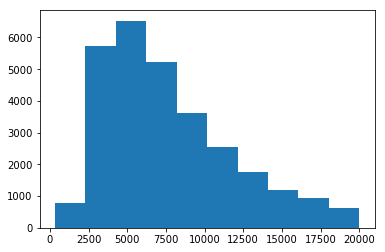

In [53]:
plt.hist(dfIncome[dfIncome['median_income'] < 20000]['median_income'].dropna());

In [54]:
dfIncome['log_med_income'] = np.log(dfIncome['median_income'])

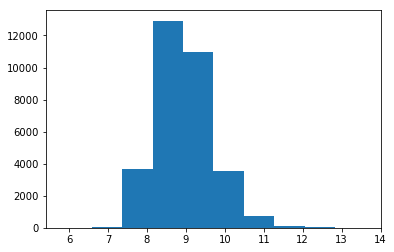

In [55]:
plt.hist(dfIncome['log_med_income'].dropna());

In [56]:
zip_med_income_dict = dict(zip(dfIncome['Id2'].values, dfIncome['median_income'].values))

Fill blanks for zipcode 11249:

In [57]:
zip_med_income_dict[11249] = zip_med_income_dict[11211]

### Pickle zipcode:income dictionary

In [58]:
zip_med_income_dict

{601: 2034.0,
 602: 1135.0,
 603: 1455.0,
 606: 1563.0,
 610: 1530.0,
 612: 1352.0,
 616: 2586.0,
 617: 2043.0,
 622: 8666.0,
 623: 1717.0,
 624: 1172.0,
 627: 1763.0,
 631: 2382.0,
 637: 1437.0,
 638: 1352.0,
 641: 1137.0,
 646: 3352.0,
 647: 2194.0,
 650: 1811.0,
 652: 4624.0,
 653: 3381.0,
 656: 1636.0,
 659: 1697.0,
 660: 2438.0,
 662: 1555.0,
 664: 1942.0,
 667: 1400.0,
 669: 1589.0,
 670: 1776.0,
 674: 1150.0,
 676: 1373.0,
 677: 2001.0,
 678: 2797.0,
 680: 2076.0,
 682: 3123.0,
 683: 1932.0,
 685: 1272.0,
 687: 1356.0,
 688: 1841.0,
 690: 4465.0,
 692: 3300.0,
 693: 1481.0,
 694: 2888.0,
 698: 1268.0,
 703: 4034.0,
 704: 2493.0,
 705: 1622.0,
 707: 3381.0,
 714: 2016.0,
 715: 3629.0,
 716: 2676.0,
 717: 2850.0,
 718: 4882.0,
 719: 3350.0,
 720: 1116.0,
 723: 2586.0,
 725: 1275.0,
 727: 2001.0,
 728: 1308.0,
 729: 1637.0,
 730: 2759.0,
 731: 5252.0,
 735: 3784.0,
 736: 2889.0,
 738: 1801.0,
 739: 1849.0,
 740: 4051.0,
 741: 4033.0,
 745: 1315.0,
 751: 1521.0,
 754: 2873.0,
 757: 

In [59]:
len(zip_med_income_dict)

33121

Pickle the dictionary:

In [ ]:
# dict_filename = 'pickled_models/zipcode_income.pkl'

# with open(dict_filename, 'wb') as handle:
#     pickle.dump(zip_med_income_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Market Rental data
Source: US Census Bureau

https://factfinder.census.gov/faces/nav/jsf/pages/guided_search.xhtml

In [60]:
dfRent = pd.read_csv('../raw_data/census/ACS_15_5YR_B25058_with_ann_RENT.csv', header=1)

In [ ]:
# dfRent.head()

In [61]:
def fix_rent(rent):
    if rent == "-":
        return np.nan
    else:
        return int(rent)

In [62]:
dfRent['median_rent'] = dfRent['Estimate; Median contract rent'].map(fix_rent)

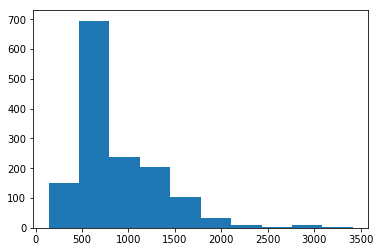

In [63]:
plt.hist(dfRent['median_rent'].dropna());

In [64]:
dfRent['log_med_rent'] = np.log(dfRent['median_rent'])

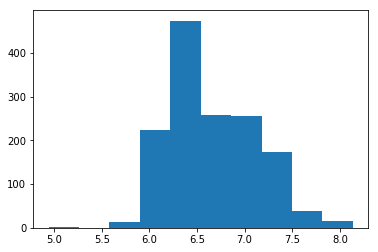

In [65]:
plt.hist(dfRent['log_med_rent'].dropna());

In [66]:
zip_median_rent_dict = dict(zip(dfRent['Id2'].values, dfRent['median_rent'].values))

Fill blanks for zipcode 11249:

In [67]:
zip_median_rent_dict[11249] = zip_median_rent_dict[11211]

### Merge income & rent data into listings dataframes

Fill NaN in 'zipcode' column

In [68]:
print(dfNov2016.zipcode.isnull().sum())
print(dfDec2016.zipcode.isnull().sum())
print(dfJan2017.zipcode.isnull().sum())
print(dfFeb2017.zipcode.isnull().sum())
print(dfMar2017.zipcode.isnull().sum())
print(dfApr2017.zipcode.isnull().sum())
print(dfMay2017.zipcode.isnull().sum())
print(dfJun2017.zipcode.isnull().sum())
print(dfJul2017.zipcode.isnull().sum())
print(dfAug2017.zipcode.isnull().sum())
print(dfSep2017.zipcode.isnull().sum())
print(dfOct2017.zipcode.isnull().sum())

548
585
619
606
633
624
612
610
613
632
576
608


In [69]:
dfNov2016.zipcode = dfNov2016.zipcode.fillna(dfNov2016.city.map(city_zip_dict))
dfDec2016.zipcode = dfDec2016.zipcode.fillna(dfDec2016.city.map(city_zip_dict))
dfJan2017.zipcode = dfJan2017.zipcode.fillna(dfJan2017.city.map(city_zip_dict))
dfFeb2017.zipcode = dfFeb2017.zipcode.fillna(dfFeb2017.city.map(city_zip_dict))
dfMar2017.zipcode = dfMar2017.zipcode.fillna(dfMar2017.city.map(city_zip_dict))
dfApr2017.zipcode = dfApr2017.zipcode.fillna(dfApr2017.city.map(city_zip_dict))
dfMay2017.zipcode = dfMay2017.zipcode.fillna(dfMay2017.city.map(city_zip_dict))
dfJun2017.zipcode = dfJun2017.zipcode.fillna(dfJun2017.city.map(city_zip_dict))
dfJul2017.zipcode = dfJul2017.zipcode.fillna(dfJul2017.city.map(city_zip_dict))
dfAug2017.zipcode = dfAug2017.zipcode.fillna(dfAug2017.city.map(city_zip_dict))
dfSep2017.zipcode = dfSep2017.zipcode.fillna(dfSep2017.city.map(city_zip_dict))
dfOct2017.zipcode = dfOct2017.zipcode.fillna(dfOct2017.city.map(city_zip_dict))

In [70]:
print(dfNov2016.zipcode.isnull().sum())
print(dfDec2016.zipcode.isnull().sum())
print(dfJan2017.zipcode.isnull().sum())
print(dfFeb2017.zipcode.isnull().sum())
print(dfMar2017.zipcode.isnull().sum())
print(dfApr2017.zipcode.isnull().sum())
print(dfMay2017.zipcode.isnull().sum())
print(dfJun2017.zipcode.isnull().sum())
print(dfJul2017.zipcode.isnull().sum())
print(dfAug2017.zipcode.isnull().sum())
print(dfSep2017.zipcode.isnull().sum())
print(dfOct2017.zipcode.isnull().sum())

50
54
53
53
58
53
51
49
51
55
44
52


In [71]:
dfNov2016['zipcode_median_income'] = dfNov2016['zipcode'].map(zip_med_income_dict)
dfNov2016['zipcode_median_rent'] = dfNov2016['zipcode'].map(zip_median_rent_dict)

In [72]:
dfDec2016['zipcode_median_income'] = dfDec2016['zipcode'].map(zip_med_income_dict)
dfDec2016['zipcode_median_rent'] = dfDec2016['zipcode'].map(zip_median_rent_dict)

In [73]:
dfJan2017['zipcode_median_income'] = dfJan2017['zipcode'].map(zip_med_income_dict)
dfJan2017['zipcode_median_rent'] = dfJan2017['zipcode'].map(zip_median_rent_dict)

In [74]:
dfFeb2017['zipcode_median_income'] = dfFeb2017['zipcode'].map(zip_med_income_dict)
dfFeb2017['zipcode_median_rent'] = dfFeb2017['zipcode'].map(zip_median_rent_dict)

In [75]:
dfMar2017['zipcode_median_income'] = dfMar2017['zipcode'].map(zip_med_income_dict)
dfMar2017['zipcode_median_rent'] = dfMar2017['zipcode'].map(zip_median_rent_dict)

In [76]:
dfApr2017['zipcode_median_income'] = dfApr2017['zipcode'].map(zip_med_income_dict)
dfApr2017['zipcode_median_rent'] = dfApr2017['zipcode'].map(zip_median_rent_dict)

In [77]:
dfMay2017['zipcode_median_income'] = dfMay2017['zipcode'].map(zip_med_income_dict)
dfMay2017['zipcode_median_rent'] = dfMay2017['zipcode'].map(zip_median_rent_dict)

In [78]:
dfJun2017['zipcode_median_income'] = dfJun2017['zipcode'].map(zip_med_income_dict)
dfJun2017['zipcode_median_rent'] = dfJun2017['zipcode'].map(zip_median_rent_dict)

In [79]:
dfJul2017['zipcode_median_income'] = dfJul2017['zipcode'].map(zip_med_income_dict)
dfJul2017['zipcode_median_rent'] = dfJul2017['zipcode'].map(zip_median_rent_dict)

In [80]:
dfAug2017['zipcode_median_income'] = dfAug2017['zipcode'].map(zip_med_income_dict)
dfAug2017['zipcode_median_rent'] = dfAug2017['zipcode'].map(zip_median_rent_dict)

In [81]:
dfSep2017['zipcode_median_income'] = dfSep2017['zipcode'].map(zip_med_income_dict)
dfSep2017['zipcode_median_rent'] = dfSep2017['zipcode'].map(zip_median_rent_dict)

In [82]:
dfOct2017['zipcode_median_income'] = dfOct2017['zipcode'].map(zip_med_income_dict)
dfOct2017['zipcode_median_rent'] = dfOct2017['zipcode'].map(zip_median_rent_dict)

## Pickle listings dataframes

For each month's dataframe, e.g.

In [ ]:
# with open('pickled_files/dfNov2016.pkl', 'wb') as picklefile:
#     pickle.dump(dfNov2016, picklefile)